# Houses Kaggle Competition (revisited with Deep Learning 🔥) 

[<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

⚙️ Let's re-use our previous **pipeline** built in the module **`05-07-Ensemble-Methods`** and try to improve our final predictions with a Neural Network!

## (0) Libraries and imports

In [1]:
%load_ext autoreload
%autoreload 2

# DATA MANIPULATION
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# VIEWING OPTIONS IN THE NOTEBOOK
from sklearn import set_config; set_config(display='diagram')

## (1) 🚀 Getting Started

### (1.1) Load the datasets

💾 Let's load our **training dataset**

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv")
X = data.drop(columns='SalePrice')
y = data['SalePrice']

In [3]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
X.shape, y.shape

((1460, 80), (1460,))

💾 Let's also load the **test set**

❗️ Remember ❗️ You have access to `X_test` but only Kaggle has `y_test`

In [5]:
X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")

In [6]:
X_test.shape

(1459, 80)

### (1.2) Train/Val Split

❓ **Holdout** ❓ 

As you are not allowed to use the test set (and you don't have access to `y_test` anyway), split your dataset into a training set and a validation set.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3) 

### (1.3) Import the preprocessor

🎁 You will find in `utils/preprocessor.py` the **`data-preprocessing pipeline`** that was built in our previous iteration.

❓ Run the cell below, and make sure you understand what the pipeline does. Look at the code in `preprocessor.py` ❓

In [34]:
from utils.preprocessor import create_preproc

preproc = create_preproc(X_train)
preproc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['1stFlrSF', '2ndFlrSF',
                                                   '3SsnPorch', 'BedroomAbvGr',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'BsmtUnfSF',
                                                   'EnclosedPorch',
                                                   'Fireplaces', 'FullBath',
                                                   'GarageArea', 'GarageCars...
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature',
                                                   'Neighborhood', 'RoofMatl',
                                                   'RoofStyle', 'SaleCondition',
                                                   'SaleType', 'Street',
                                                   'Utilities'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x7fca4fbf4ca0>))])

❓ **Scaling your numerical features and encoding the categorical features** ❓

Apply these transformations to _both_ your training set and your validation set.

In [135]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
preproc.fit(X_train, y_train)

X_transform = preproc.transform(X_train)
X_val_transform = preproc.transform(X_val)

## (2) 🔮 Your predictions in Tensorflow/Keras

🚀 This is your first **regression** task with Keras! 

💡 Here a few tips to get started:
- Kaggle's [rule](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) requires to minimize **`rmsle`** (Root Mean Square Log Error). 
    - As you can see, we can specify `msle` directly as a loss-function with Tensorflow.Keras!
    - Just remember to take the square-root of your loss results to read your rmsle metric.
    
    
😃 The best boosted-tree ***rmsle*** score to beat is around ***0.13***

---

<img src="https://i.pinimg.com/564x/4c/fe/ef/4cfeef34af09973211f584e8307b433c.jpg" alt="`Impossible mission" style="height: 300px; width:500px;"/>

---


❓ **Your mission, should you choose to accept it:** ❓
- 💪 Beat the best boosted-tree 💪 

    - Your responsibilities are:
        - to build the ***best neural network architecture*** possible,
        - and to control the number of epochs to ***avoid overfitting***.

### (2.1) Predicting the houses' prices using a Neural Network

❓ **Preliminary Question: Initializing a Neural Network** ❓

Create a function `initialize_model` which initializes a Dense Neural network:
- You are responsible for designing the architecture (number of layers, number of neurons)
- The function should also compile the model with the following parameters:
    - ***optimizer = "adam"***
    - ***loss = "msle"*** (_Optimizing directly for the Squared Log Error!_)
        

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

2022-09-08 21:26:31.018682: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-08 21:26:31.018740: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [139]:
# YOUR CODE HERE
def initialize_model():
    model = Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=157))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    
    model.compile(
    optimizer='adam',
    loss='msle', 
    metrics = ['msle', 'mse', 'mae'])
    
    return model

model = initialize_model()

In [140]:
X_train.shape

(1022, 80)

❓ **Questions/Guidance** ❓

1. Initialize a Neural Network
2. Train it
3. Evaluate its performance
4. Is the model overfitting the dataset? 

In [141]:
# YOUR CODE HERE
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 50)                7900      
                                                                 
 dense_54 (Dense)            (None, 50)                2550      
                                                                 
 dense_55 (Dense)            (None, 50)                2550      
                                                                 
 dense_56 (Dense)            (None, 50)                2550      
                                                                 
 dense_57 (Dense)            (None, 50)                2550      
                                                                 
 dense_58 (Dense)            (None, 50)                2550      
                                                                 
 dense_59 (Dense)            (None, 50)              

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(X_transform, y_train, batch_size=32, epochs=10000, callbacks=[es])

Epoch 1/10000
32/32 [==============================] - 2s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 2/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 3/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 4/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 5/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 6/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 7/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 1792

32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9219
Epoch 22/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 23/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 24/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9062
Epoch 25/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 26/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 27/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8750


32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 43/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 44/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 45/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.8594
Epoch 46/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.8906
Epoch 47/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 48/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906


32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 63/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 64/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 65/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 66/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 67/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 68/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062


32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 84/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 85/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 86/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 87/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9375
Epoch 88/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8750
Epoch 89/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906


32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 104/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 105/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915967488.0000 - mae: 179238.8906
Epoch 106/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 107/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 108/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 109/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 125/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 126/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 127/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 128/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 129/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 130/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9375
Epoch 145/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 146/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 147/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 148/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 149/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 150/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 166/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 167/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8750
Epoch 168/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 169/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 170/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 171/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9375
Epoch 186/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9375
Epoch 187/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 188/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 189/10000
32/32 [==============================] - 0s 8ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 190/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 191/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 207/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 208/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 209/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 210/10000
32/32 [==============================] - 0s 7ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 211/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.8750
Epoch 212/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 227/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 228/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 229/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 230/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 231/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 232/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 248/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8750
Epoch 249/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 250/10000
32/32 [==============================] - 0s 8ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 251/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 252/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 253/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 268/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 269/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 270/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 271/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 272/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 273/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8594
Epoch 289/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 290/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 291/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 292/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 293/10000
32/32 [==============================] - 0s 7ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 294/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 309/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9375
Epoch 310/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 311/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 312/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 313/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 314/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 330/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 331/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 332/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 333/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 334/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 335/10000
32/32 [==============================] - 0s 7ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9219
Epoch 350/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 351/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 352/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 353/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 354/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 355/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 371/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 372/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 373/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9375
Epoch 374/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9062
Epoch 375/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 376/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 391/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 392/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 393/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 394/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 395/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 396/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 412/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 413/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 414/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 415/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 416/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 417/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 432/10000
32/32 [==============================] - 0s 9ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 433/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 434/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 435/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 436/10000
32/32 [==============================] - 0s 8ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 437/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 453/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 454/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 455/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 456/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 457/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 458/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 473/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 474/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 475/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 476/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9375
Epoch 477/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 478/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 494/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 495/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 496/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 497/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 498/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 499/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 514/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 515/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 516/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 517/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 518/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 519/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 535/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 536/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 537/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 538/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 539/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 540/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 555/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 556/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 557/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 558/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 559/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9062
Epoch 560/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 576/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 577/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 578/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915967488.0000 - mae: 179238.8906
Epoch 579/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 580/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 581/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 596/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 597/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 598/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 599/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 600/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 601/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 617/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9531
Epoch 618/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 619/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 620/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 621/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 622/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 637/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 638/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 639/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 640/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 641/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 642/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915967488.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 658/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8594
Epoch 659/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 660/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9062
Epoch 661/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 662/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 663/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 678/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 679/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 680/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 681/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 682/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915967488.0000 - mae: 179238.9062
Epoch 683/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 699/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 700/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 701/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9375
Epoch 702/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 703/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 704/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 719/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 720/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 721/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 722/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 723/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 724/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9062
Epoch 740/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 741/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 742/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 743/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 744/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 745/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8750
Epoch 760/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 761/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 762/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 763/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 764/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 765/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 781/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 782/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 783/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 784/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 785/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 786/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 801/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 802/10000
32/32 [==============================] - 0s 8ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 803/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8594
Epoch 804/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 805/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.8906
Epoch 806/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 822/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915967488.0000 - mae: 179238.9219
Epoch 823/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 824/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 825/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 826/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8594
Epoch 827/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 842/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 843/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 844/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 845/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.8906
Epoch 846/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9375
Epoch 847/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 863/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 864/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 865/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 866/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 867/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 868/10000
32/32 [==============================] - 0s 7ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 883/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 884/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 885/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 886/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 887/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 888/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 904/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8750
Epoch 905/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 906/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 907/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 908/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 909/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238

32/32 [==============================] - 0s 8ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 924/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 925/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 926/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8594
Epoch 927/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 928/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 929/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 945/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 946/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 947/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 948/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 949/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 950/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 965/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 966/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 967/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 968/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 969/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 970/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 986/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 987/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915967488.0000 - mae: 179238.8906
Epoch 988/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 989/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 990/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 991/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238

32/32 [==============================] - 0s 8ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1006/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 1007/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 1008/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1009/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1010/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1011/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 

Epoch 1026/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1027/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1028/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 1029/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 1030/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 1031/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1032/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 3791597

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1047/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1048/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1049/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1050/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 1051/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1052/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 1067/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1068/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1069/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 1070/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1071/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9375
Epoch 1072/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9062
Epoch 1087/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 1088/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1089/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 1090/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1091/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1092/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 

32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 1107/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1108/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9375
Epoch 1109/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 1110/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 1111/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 1112/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9375
Epoch 1127/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 1128/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9375
Epoch 1129/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1130/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9219
Epoch 1131/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 1132/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1147/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1148/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 1149/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 1150/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1151/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1152/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 1167/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1168/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1169/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9375
Epoch 1170/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1171/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915967488.0000 - mae: 179238.8906
Epoch 1172/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1187/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1188/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8750
Epoch 1189/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1190/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1191/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1192/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1207/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1208/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9219
Epoch 1209/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1210/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1211/10000
32/32 [==============================] - 0s 8ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1212/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1227/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1228/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1229/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1230/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1231/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 1232/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 1247/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915983872.0000 - mae: 179238.9219
Epoch 1248/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1249/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8594
Epoch 1250/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 1251/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1252/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1267/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 1268/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 1269/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1270/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8750
Epoch 1271/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1272/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 

32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1287/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.9062
Epoch 1288/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1289/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915971584.0000 - mae: 179238.8906
Epoch 1290/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 1291/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1292/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 

32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9062
Epoch 1307/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9375
Epoch 1308/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1309/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.8906
Epoch 1310/10000
32/32 [==============================] - 0s 6ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.9219
Epoch 1311/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 179238.8906
Epoch 1312/10000
32/32 [==============================] - 0s 5ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915979776.0000 - mae: 

32/32 [==============================] - 0s 9ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9219
Epoch 1327/10000
32/32 [==============================] - 0s 11ms/step - loss: 144.5958 - msle: 144.5958 - mse: 37915975680.0000 - mae: 179238.9062
Epoch 1328/10000
 1/32 [..............................] - ETA: 0s - loss: 143.0057 - msle: 143.0057 - mse: 32188352512.0000 - mae: 166227.7188

In [121]:
import math

In [137]:
msle = model.evaluate(X_val_transform, y_val)[1]

14/14 [==============================] - 0s 3ms/step - loss: 0.0204 - msle: 0.0204 - mse: 1119980672.0000 - mae: 18906.1230


In [138]:
rmsle = math.sqrt(msle)
rmsle

0.14298286863352042

🎁 We coded a `plot_history` function that you can use to detect overfitting

In [63]:
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

KeyError: 'val_loss'

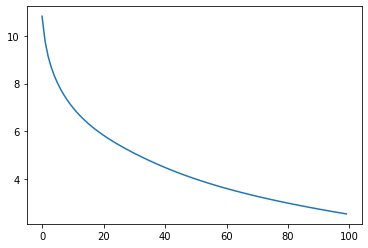

In [64]:
# YOUR CODE HERE
plot_history(history)

### (2.2) Challenging yourself

❓ **Questions to challenge yourself:** ❓
- Are you satisfied with your score?
- Before publishing it, ask yourself whether you could really trust it or not?
- Have you cross-validated your neural network? 
    - Feel free to cross-validate it manually with a *for loop* in Python to make sure that your results are robust against the randomness of a _train-val split_ before before submitting to Kaggle

### (2.3) (Bonus) Using all your CPU cores to run Neural Networks

🔥 **BONUS** 🔥 **Multiprocessing computing using [dask](https://docs.dask.org/en/latest/delayed.html)** and **all your CPU cores**:

_(to mimic SkLearn's `n_jobs=-1`)_

In [ ]:
!pip install --quiet dask

In [ ]:
from sklearn.model_selection import KFold
from dask import delayed

# cv = 5
# kf = KFold(n_splits = cv, shuffle = True)
# f = delayed(evaluate_model)

# results = delayed([f(X, y, train_index, val_index) for (train_index, val_index) in kf.split(X)
#                   ]).compute(
#                       scheduler='processes', num_workers=8)

# pd.concat(results, axis=0).reset_index(drop=True)

## (3) 🏅FINAL SUBMISSION

🦄 Predict the ***prices of the houses in your test set*** and submit your results to Kaggle! 



In [ ]:
# X_test = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/houses_test_raw.csv")
# X_test_preproc = preproc.transform(X_test)
# ALREADY DONE ABOVE

In [ ]:
# YOUR CODE HERE

💾 Save your predictions in a Dataframe called `results` with the format required by Kaggle so that when you export it to a `.csv`, Kaggle can read it.

In [ ]:
# YOUR CODE HERE

📤  Export your results using Kaggle's submission format and submit it online!

_(Uncomment the last cell of this notebook)_

In [ ]:
# results.to_csv("submission_final.csv", header = True, index = False)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... it's time for the Recap!